In [1]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
def reshape_polygon(poly):
    poly = np.array(poly)
    _ , l = poly.shape
    return poly.reshape(l//2, 2).transpose()

def conv_bbox(bbox):
    xmi, ymi, xma, yma = bbox
    return np.array([[xmi,ymi],[xmi,yma],[xma,yma],[xma,ymi],[xmi,ymi]]).transpose()

In [7]:
dataset = np.random.choice(glob.glob('../*RG*/train/C*a*'))
print(f'Dataset is {os.path.basename(dataset)}')

Dataset is CPT2a-n


In [8]:
with open(os.path.join(dataset,'segs.json')) as f:
    data = json.load(f)
num_tiles=len(data)
print(f'{num_tiles} tiles in {dataset}')

2140 tiles in ../RGBD-Tree-Segs/train/CPT2a-n


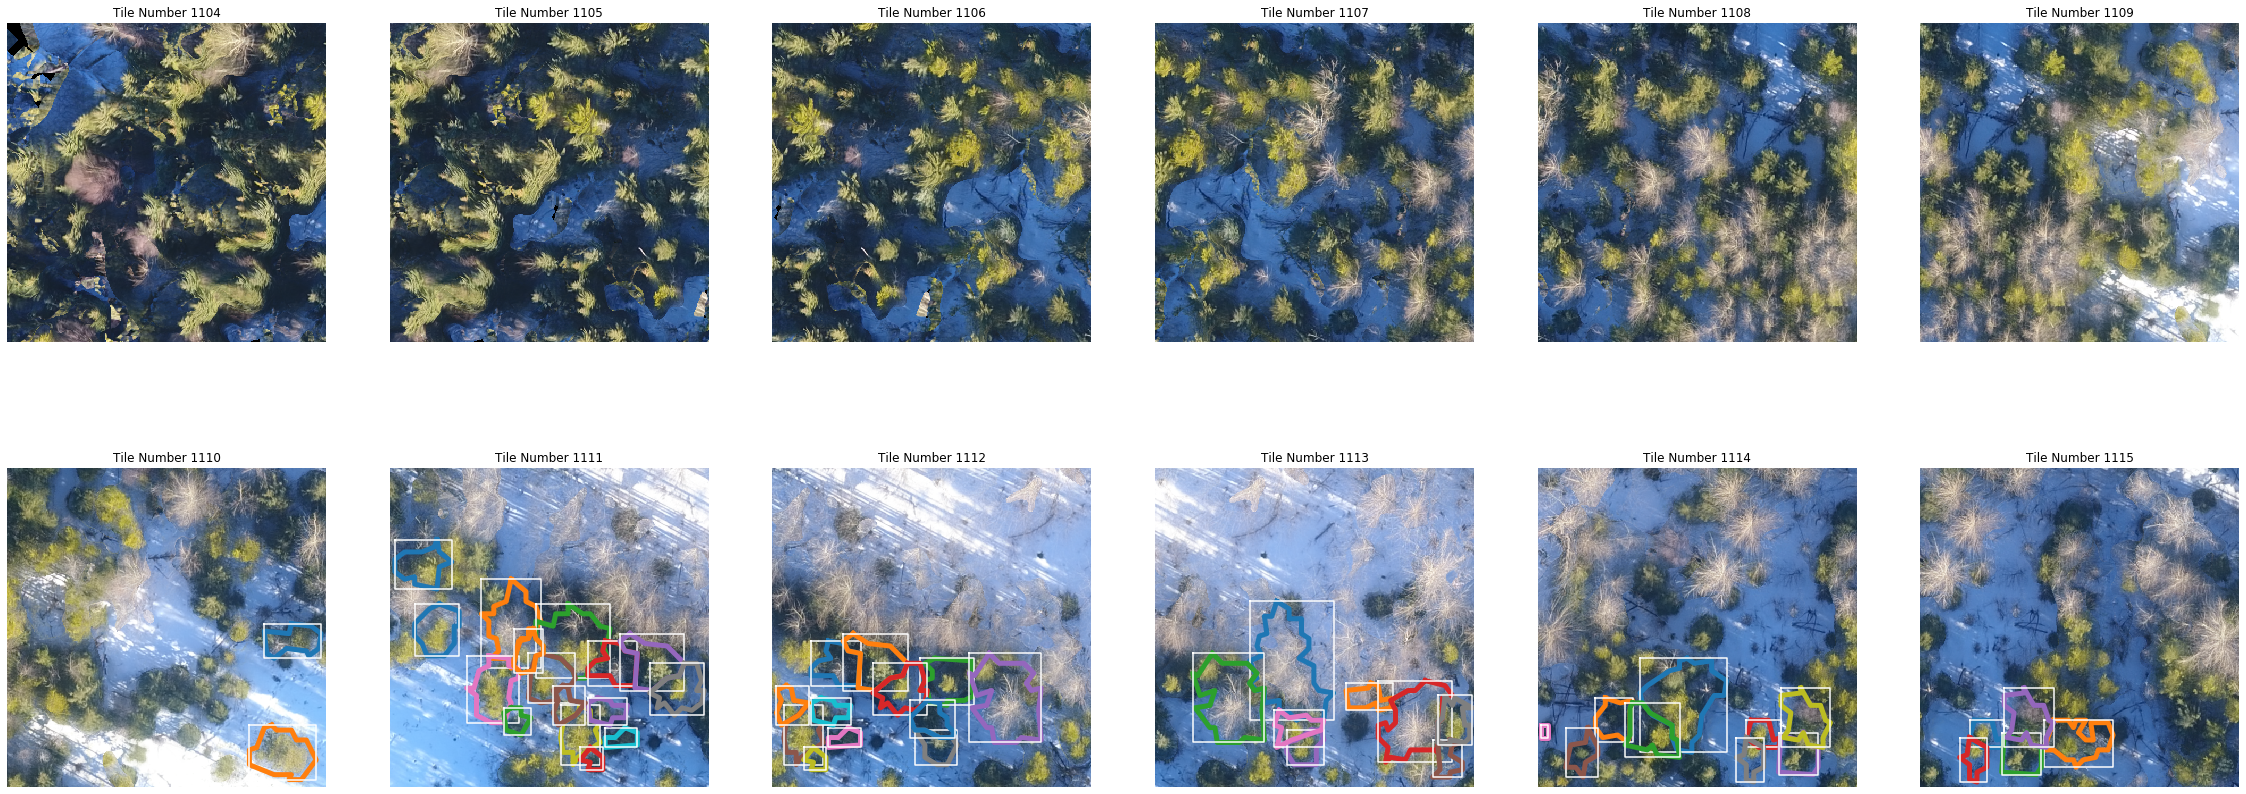

In [41]:
fig, axes = plt.subplots(2,6, figsize=(40,15))
t=np.random.randint(0, num_tiles-12)
for ax in axes.ravel():
    
    segs_and_boxes = [(x['segmentation'], x['bbox']) for x in data[t]['annotations']]
    
    img = cv2.imread('../'+data[t]['file_name'])
    ax.set_axis_off()
    ax.imshow(img)
    ax.set_title(f'Tile Number {t}')
    for seg, bbox in segs_and_boxes:
        ax.plot(*reshape_polygon(seg), linewidth=5)
        ax.plot(*conv_bbox(bbox), c='w')
    t += 1

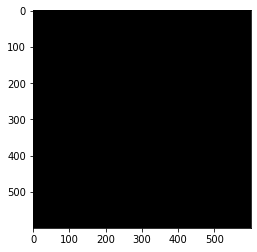

In [55]:
img = cv2.imread('../'+data[1651]['file_name'])
plt.imshow(img)

In [25]:
img[-1,0]

array([0, 0, 0], dtype=uint8)

In [56]:
bcount,gcount = 0, 0
for row in img:
    for pixel in row:
        if (pixel==0).all():
            bcount+=1
        else:
            gcount+=1
print(f'Black: {bcount}, Non-Black: {gcount}, Ratio: {gcount/bcount:.2f}')
if gcount/bcount < 100:
    print('Bad Image')
else:
    print('Good Image')

Black: 360000, Non-Black: 0, Ratio: 0.00
Bad Image
